# FastAI Experments to Predict MOO Dropout

<a href="https://colab.research.google.com/github/rambasnet/DeepLearningMaliciousURLs/blob/master/FastAI-Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [9]:
from fastai.tabular.all import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import os
import sys
import glob
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn import model_selection
from tabulate import tabulate

### Note Notebook doesn't display all the rows and columns
- let's fix that

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Run experiments on Xeutangx dataset

## Check CSV files inside FinalDataset folder
- if it doesn't exists, download data using Bash script in Baseline-Experiments notebook

In [3]:
! ls data/xeutangx

all_normalized_features.csv           test_normalized_features.csv
course_info.csv                       test_normalized_trimmed_features.csv
features_statistics.csv               train_features.csv
merged_normalized_all.csv             train_normalized_features.csv
test_features.csv                     train_normalized_trimmed_features.csv


### Load and cleanup data

In [23]:
# Import the training data
path = 'data/xeutangx'
f_train = 'train_normalized_trimmed_features.csv'
df_train = pd.read_csv(os.path.join(path, f_train))

f_test = 'test_normalized_trimmed_features.csv'
df_test = pd.read_csv(os.path.join(path, f_test))
bad_features = ['enroll_id', 'username', 'course_id']
df_train.drop(labels=bad_features, axis='columns', inplace=True)
df_test.drop(labels=bad_features, axis='columns', inplace=True)
df = pd.concat([df_train, df_test])
dep_var = 'truth'
X = df.loc[:, df.columns != dep_var]
y = df[dep_var]

In [24]:
# Split-out validation dataset
def splitDataset(X, Y):
    validation_size = 0.20
    random_seed = 100
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                    test_size=validation_size, 
                                                                                    random_state=random_seed)
    return X_train, X_validation, Y_train, Y_validation

In [37]:
X_train, X_test, Y_train, Y_test = splitDataset(X, y)

In [38]:
X_train.head()

action_count  session_count  seek_video_count  play_video_count  \
60689      -0.211068      -0.211068         -0.243043         -0.283061   
134615     -0.222201      -0.222201         -0.243043         -0.296739   
83880      -0.225912      -0.225912         -0.243043         -0.296739   
13829      -0.097261      -0.097261         -0.072657         -0.159960   
58737      -0.223438      -0.223438         -0.243043         -0.296739   

        pause_video_count  stop_video_count  load_video_count  \
60689           -0.296012         -0.059298         -0.373865   
134615          -0.333535         -0.059298         -0.480968   
83880           -0.333535         -0.059298         -0.480968   
13829           -0.145922         -0.048180         -0.016852   
58737           -0.333535         -0.059298         -0.480968   

        problem_get_count  problem_check_count  problem_save_count  \
60689           -0.042412            -0.305844           -0.202161   
134615          -0.042412            -0.305844           -0.202161   
83880           -0.036598            -0.305844            0.175968   
13829           -0.039505            -0.305844           -0.202161   
58737           -0.042412            -0.305844           -0.202161   

        reset_problem_count  problem_check_correct_count  \
60689             -0.103969                    -0.337528   
134615            -0.103969                    -0.337528   
83880             -0.103969                    -0.337528   
13829             -0.103969                    -0.337528   
58737             -0.103969                    -0.337528   

        problem_check_incorrect_count  create_thread_count  \
60689                       -0.237532            -0.104921   
134615                      -0.237532            -0.104921   
83880                       -0.237532            -0.104921   
13829                       -0.237532            -0.104921   
58737                       -0.237532            -0.104921   

        create_comment_count  delete_thread_count  delete_comment_count  \
60689              -0.103794            -0.020105             -0.037288   
134615             -0.103794            -0.020105             -0.037288   
83880              -0.103794            -0.020105             -0.037288   
13829              -0.103794            -0.020105             -0.037288   
58737              -0.103794            -0.020105             -0.037288   

        click_info_count  click_courseware_count  click_about_count  \
60689          -0.278360               -0.394335           0.107758   
134615         -0.278360               -0.428333           0.241576   
83880          -0.490464               -0.428333          -0.427513   
13829          -0.066255                0.081645           0.107758   
58737          -0.278360               -0.428333          -0.159877   

        click_forum_count  click_progress_count  close_courseware_count  age  \
60689            -0.17735             -0.284796               -0.428065    0   
134615           -0.17735             -0.284796               -0.464309    0   
83880            -0.17735             -0.284796               -0.464309    0   
13829            -0.17735             -0.284796                0.115598    0   
58737            -0.17735              0.169638               -0.464309    0   

        gender  education  user_enroll_count  course_enroll_count  \
60689        0          0                  3                  894   
134615       0          0                  2                 1766   
83880        0          0                  4                  372   
13829        0          0                  7                 3095   
58737        0          0                  3                  578   

        course_category  
60689                 0  
134615                0  
83880                 0  
13829                 0  
58737                 0

In [39]:
Y_train.head()

60689     1
134615    1
83880     1
13829     1
58737     1
Name: truth, dtype: int64

In [40]:
df1 = pd.concat([X_train, Y_train], axis=1, join='inner')

In [41]:
df1.head()

action_count  session_count  seek_video_count  play_video_count  \
60689      -0.211068      -0.211068         -0.243043         -0.283061   
134615     -0.222201      -0.222201         -0.243043         -0.296739   
83880      -0.225912      -0.225912         -0.243043         -0.296739   
13829      -0.097261      -0.097261         -0.072657         -0.159960   
58737      -0.223438      -0.223438         -0.243043         -0.296739   

        pause_video_count  stop_video_count  load_video_count  \
60689           -0.296012         -0.059298         -0.373865   
134615          -0.333535         -0.059298         -0.480968   
83880           -0.333535         -0.059298         -0.480968   
13829           -0.145922         -0.048180         -0.016852   
58737           -0.333535         -0.059298         -0.480968   

        problem_get_count  problem_check_count  problem_save_count  \
60689           -0.042412            -0.305844           -0.202161   
134615          -0.042412            -0.305844           -0.202161   
83880           -0.036598            -0.305844            0.175968   
13829           -0.039505            -0.305844           -0.202161   
58737           -0.042412            -0.305844           -0.202161   

        reset_problem_count  problem_check_correct_count  \
60689             -0.103969                    -0.337528   
134615            -0.103969                    -0.337528   
83880             -0.103969                    -0.337528   
13829             -0.103969                    -0.337528   
58737             -0.103969                    -0.337528   

        problem_check_incorrect_count  create_thread_count  \
60689                       -0.237532            -0.104921   
134615                      -0.237532            -0.104921   
83880                       -0.237532            -0.104921   
13829                       -0.237532            -0.104921   
58737                       -0.237532            -0.104921   

        create_comment_count  delete_thread_count  delete_comment_count  \
60689              -0.103794            -0.020105             -0.037288   
134615             -0.103794            -0.020105             -0.037288   
83880              -0.103794            -0.020105             -0.037288   
13829              -0.103794            -0.020105             -0.037288   
58737              -0.103794            -0.020105             -0.037288   

        click_info_count  click_courseware_count  click_about_count  \
60689          -0.278360               -0.394335           0.107758   
134615         -0.278360               -0.428333           0.241576   
83880          -0.490464               -0.428333          -0.427513   
13829          -0.066255                0.081645           0.107758   
58737          -0.278360               -0.428333          -0.159877   

        click_forum_count  click_progress_count  close_courseware_count  age  \
60689            -0.17735             -0.284796               -0.428065    0   
134615           -0.17735             -0.284796               -0.464309    0   
83880            -0.17735             -0.284796               -0.464309    0   
13829            -0.17735             -0.284796                0.115598    0   
58737            -0.17735              0.169638               -0.464309    0   

        gender  education  user_enroll_count  course_enroll_count  \
60689        0          0                  3                  894   
134615       0          0                  2                 1766   
83880        0          0                  4                  372   
13829        0          0                  7                 3095   
58737        0          0                  3                  578   

        course_category  truth  
60689                 0      1  
134615                0      1  
83880                 0      1  
13829                 0      1  
58737                 0      1

In [42]:
df1.shape

(180513, 30)

In [44]:
X_train.shape

(180513, 29)

In [48]:
def train_and_eval_fastai(df, X_test, Y_test, y_names, feature_set):
    print('Training and Evaluating Fast.ai...')
    splits = RandomSplitter(valid_pct=0.2)(range_of(df))

    tp = TabularPandas(df, procs=[Normalize, FillMissing],
                        cat_names= [],
                        cont_names = list(feature_set),
                        y_names= y_names,
                        splits=splits)

    dls = tp.dataloaders(bs=64)
    #dls.show_batch()
    #return
    dnn_fastai = tabular_learner(dls, metrics=accuracy)
    dnn_fastai.fit_one_cycle(2)

    # acquire predictions
    y_pred = []
    #print('Length of test set: {}'.format(len(y_test)))
    for j in range(len(X_test)):
        row, clas, probs = dnn_fastai.predict(X_test.iloc[j])
        #print(clas)
        pred = 0
        if clas == tensor(1):
            pred = 1
        y_pred.append(pred)

    acc = accuracy_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred, average='weighted')
    prec = precision_score(Y_test, y_pred, average='weighted')
    auc = roc_auc_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    table = []
    headers = ['acc', 'rec', 'prec', 'auc', 'f1']
    table.append([f'{100*acc:.2f}', f'{100*rec:.2f}', f'{100*prec}', f'{100*auc:.2f}', f'{100*f1:.2f}'])
    print(tablulate(table, headers=headers))
    dnn_fastai.save('.model'.format(os.path.basename(path)))
    return dnn_fastai

In [49]:
y_names = 'truth'
model = train_and_eval_fastai(df1, X_test, Y_test, y_names, list(X.columns))

Training and Evaluating Fast.ai...


NameError: name 'accuracy_score' is not defined

In [59]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)

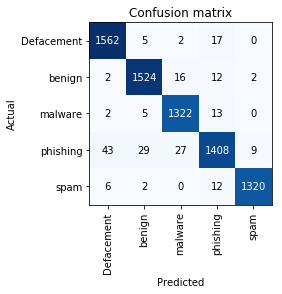

In [60]:
interp.plot_confusion_matrix(slice_size=10)

In [61]:
print(interp.confusion_matrix())

[[1562    5    2   17    0]
 [   2 1524   16   12    2]
 [   2    5 1322   13    0]
 [  43   29   27 1408    9]
 [   6    2    0   12 1320]]


In [62]:
interp.most_confused()

[('phishing', 'Defacement', 43),
 ('phishing', 'benign', 29),
 ('phishing', 'malware', 27),
 ('Defacement', 'phishing', 17),
 ('benign', 'malware', 16),
 ('malware', 'phishing', 13),
 ('benign', 'phishing', 12),
 ('spam', 'phishing', 12),
 ('phishing', 'spam', 9),
 ('spam', 'Defacement', 6),
 ('Defacement', 'benign', 5),
 ('malware', 'benign', 5),
 ('Defacement', 'malware', 2),
 ('benign', 'Defacement', 2),
 ('benign', 'spam', 2),
 ('malware', 'Defacement', 2),
 ('spam', 'benign', 2)]

## Experiments on KDD-Cup dataset with our Features

## Experiments on KDD-Cup dataset generated by Stanford Group